Connecting with the Drive

In [238]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [239]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [240]:
# Set visualization style
sns.set_theme(style="whitegrid")

Loading datasets

In [241]:
customer_data = pd.read_csv("/content/drive/MyDrive/Customers.csv")
customer_data

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15
...,...,...,...,...
195,C0196,Laura Watts,Europe,2022-06-07
196,C0197,Christina Harvey,Europe,2023-03-21
197,C0198,Rebecca Ray,Europe,2022-02-27
198,C0199,Andrea Jenkins,Europe,2022-12-03


In [242]:
product_data = pd.read_csv("/content/drive/MyDrive/Products.csv")
product_data

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31
...,...,...,...,...
95,P096,SoundWave Headphones,Electronics,307.47
96,P097,BookWorld Cookbook,Books,319.34
97,P098,SoundWave Laptop,Electronics,299.93
98,P099,SoundWave Mystery Book,Books,354.29


In [243]:
transaction_data = pd.read_csv("/content/drive/MyDrive/Transactions.csv")
transaction_data

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68
...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86


Dataset info for each dataset (Customer, Product and Transaction)

In [244]:
print(customer_data.info())
print(product_data.info())
print(transaction_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------

Data preprocessing

In [245]:
transaction_data.columns

Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price'],
      dtype='object')

In [246]:
# convert dates across all three datasets into datetime format

customer_data['SignupDate'] = pd.to_datetime(customer_data['SignupDate'])
transaction_data['TransactionDate'] = pd.to_datetime(transaction_data['TransactionDate'])

In [247]:
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   TransactionID    1000 non-null   object        
 1   CustomerID       1000 non-null   object        
 2   ProductID        1000 non-null   object        
 3   TransactionDate  1000 non-null   datetime64[ns]
 4   Quantity         1000 non-null   int64         
 5   TotalValue       1000 non-null   float64       
 6   Price            1000 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 54.8+ KB


In [248]:
# merging datasets

merged_data1 = transaction_data.merge(customer_data, on='CustomerID', how='left')
# merged_data1

merged_data = merged_data1.merge(product_data, on='ProductID', how='left')
merged_data

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86,Jacob Holt,South America,2022-01-22,SoundWave Smartwatch,Electronics,459.86
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86,Mrs. Kimberly Wright,North America,2024-04-07,SoundWave Smartwatch,Electronics,459.86
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86,Tyler Haynes,North America,2024-09-21,SoundWave Smartwatch,Electronics,459.86
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86,Joshua Hamilton,Asia,2024-11-11,SoundWave Smartwatch,Electronics,459.86


Checking for NaN/NULL values

In [249]:
merged_data.isnull().sum()

,0
TransactionID,0
CustomerID,0
ProductID,0
TransactionDate,0
Quantity,0
TotalValue,0
Price_x,0
CustomerName,0
Region,0
SignupDate,0


In [250]:
merged_data.drop('Price_y', axis=1, inplace=True)
merged_data.rename(columns= {'Price_x':'Price'}, inplace=True)

In [251]:
merged_data

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,CustomerName,Region,SignupDate,ProductName,Category
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics
...,...,...,...,...,...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86,Jacob Holt,South America,2022-01-22,SoundWave Smartwatch,Electronics
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86,Mrs. Kimberly Wright,North America,2024-04-07,SoundWave Smartwatch,Electronics
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86,Tyler Haynes,North America,2024-09-21,SoundWave Smartwatch,Electronics
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86,Joshua Hamilton,Asia,2024-11-11,SoundWave Smartwatch,Electronics


In [252]:
merged_data.columns

Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price', 'CustomerName', 'Region',
       'SignupDate', 'ProductName', 'Category'],
      dtype='object')

In [253]:
# basic statistical info
merged_data[['Quantity', 'TotalValue', 'Price']].describe()

,Quantity,TotalValue,Price
count,1000.000000,1000.000000,1000.00000
mean,2.537000,689.995560,272.55407
std,1.117981,493.144478,140.73639
min,1.000000,16.080000,16.08000
25%,2.000000,295.295000,147.95000
50%,3.000000,588.880000,299.93000
75%,4.000000,1011.660000,404.40000
max,4.000000,1991.040000,497.76000


EDA - Exploratory Data Analysis

1. Revenue by region

In [254]:
regional_revenue = merged_data.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)

print(regional_revenue)

Region
South America    219352.56
Europe           166254.63
North America    152313.40
Asia             152074.97
Name: TotalValue, dtype: float64


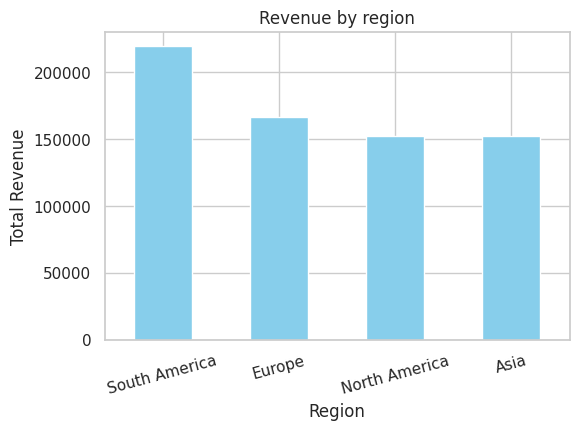

In [255]:
# Plot for Revenue by region
plt.figure(figsize=(6, 4))
regional_revenue.plot(kind='bar', color='skyblue')
plt.title("Revenue by region")
plt.xlabel("Region")
plt.ylabel("Total Revenue")
plt.xticks(rotation=15)
plt.show()

2. Most Popular product categories

In [256]:
category_sales = merged_data.groupby('Category')['Quantity'].sum().sort_values(ascending=False)
category_sales

,Quantity
Category,
Books,681
Home Decor,639
Electronics,627
Clothing,590


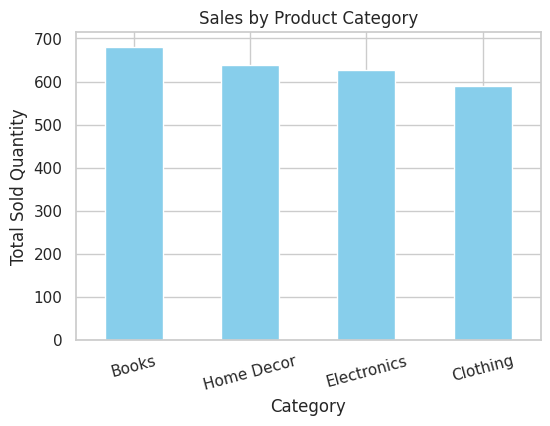

In [257]:
# Plot for Most popular product categories
plt.figure(figsize=(6, 4))
category_sales.plot(kind='bar', color='skyblue')
plt.title("Sales by Product Category")
plt.xlabel("Category")
plt.ylabel("Total Sold Quantity")
plt.xticks(rotation=15)
plt.show()

In [258]:
merged_data.columns

Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price', 'CustomerName', 'Region',
       'SignupDate', 'ProductName', 'Category'],
      dtype='object')

3. Monthly Revenue trends

In [259]:
temp_month = merged_data['TransactionDate'].dt.to_period('M')
monthly_revenue = merged_data.groupby(temp_month)['TotalValue'].sum()
monthly_revenue

,TotalValue
TransactionDate,
2023-12,3769.52
2024-01,66376.39
2024-02,51459.27
2024-03,47828.73
2024-04,57519.06
2024-05,64527.74
2024-06,48771.18
2024-07,71366.39
2024-08,63436.74


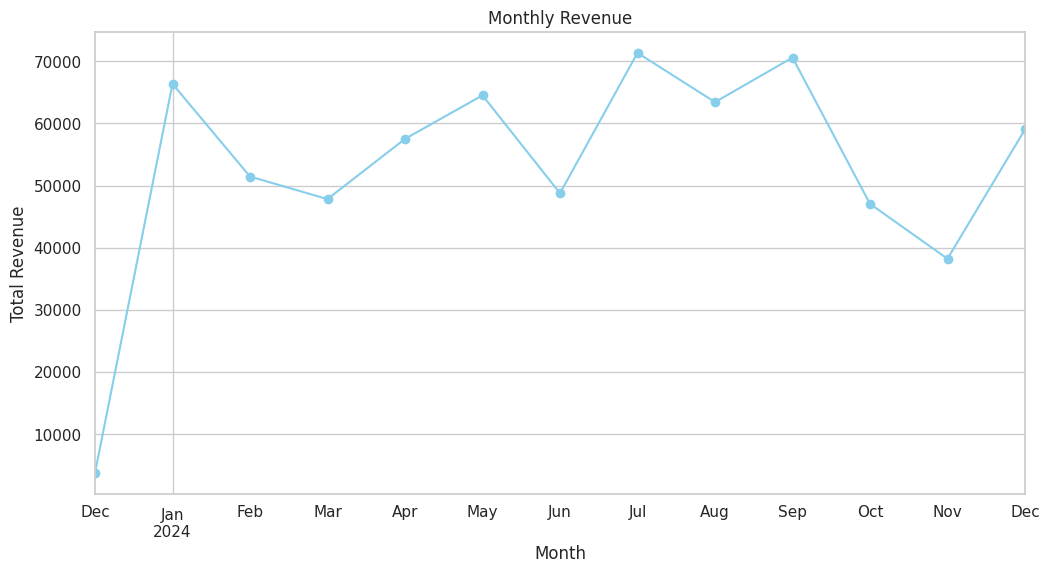

In [260]:
# Plot for Monthly Revenue Trends
plt.figure(figsize=(12, 6))
monthly_revenue.plot(marker='o', color='skyblue')
plt.title("Monthly Revenue")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.grid(True)
plt.show()

4. Top Customers by spendings

In [261]:
top_Customers = merged_data.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False)[:10]
top_Customers

,TotalValue
CustomerID,
C0141,10673.87
C0054,8040.39
C0065,7663.70
C0156,7634.45
C0082,7572.91
C0188,7111.32
C0059,7073.28
C0028,6819.57
C0099,6715.72


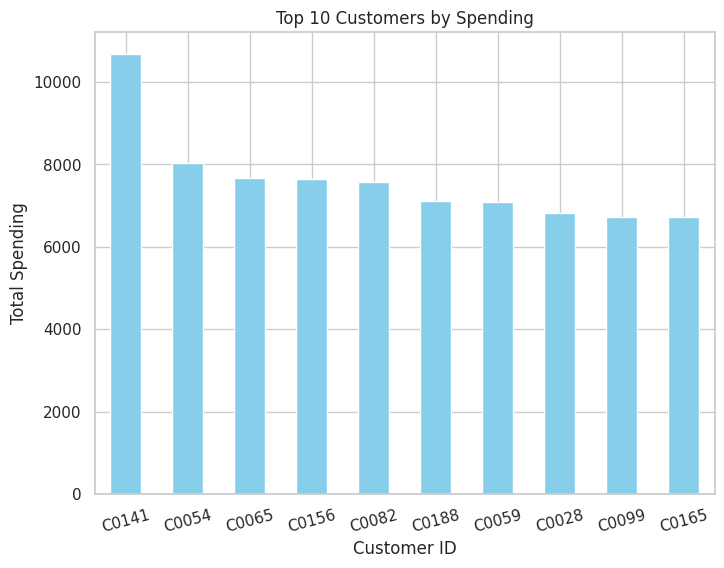

In [262]:
# Plot for Top Customers by spending
plt.figure(figsize=(8, 6))
top_Customers.plot(kind='bar', color='skyblue')
plt.title("Top 10 Customers by Spending")
plt.xlabel("Customer ID")
plt.ylabel("Total Spending")
plt.xticks(rotation=15)
plt.show()

5. Product Price Distribution

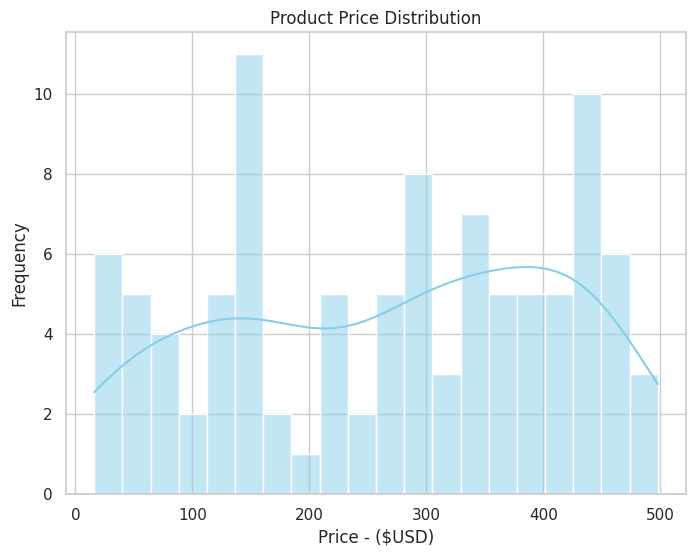

In [263]:
plt.figure(figsize=(8, 6))
sns.histplot(product_data['Price'], bins=20, kde=True, color='skyblue')
plt.title('Product Price Distribution')
plt.xlabel('Price - ($USD)')
plt.ylabel('Frequency')
plt.show()